# Grade infinflate at UK HEI

## Purpose

Perform a test of the hypothesis that the proportion of UGD with first class honour increased in 2018/19 compared to 2014/5.

## 2. Setup the notebook

### 2.1 Import the libraries

In [19]:
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Load the data

In [2]:
df_firsts = pd.read_csv("..\\data\\grade-inflation.csv")

## 3. Explore the data

### 3.1 Preview the data

In [3]:
df_firsts.head()

,HE provider,f_2014,n_2014,f_2018,n_2018
0,The University of Stirling,265,1230,305,1790
1,University of Hertfordshire,875,4470,1150,4755
2,The University of York,800,3235,1015,3735
3,The University of Liverpool,1085,4805,1765,6635
4,The University of St Andrews,415,1565,515,1765


### 3.2 Describe the data

In [4]:
df_firsts.describe()

,f_2014,n_2014,f_2018,n_2018
count,156.000000,156.000000,156.000000,156.000000
mean,523.108974,2534.198718,730.769231,2715.352564
std,411.733293,1810.862341,567.598266,1900.630635
min,10.000000,45.000000,15.000000,65.000000
25%,168.750000,1025.000000,232.500000,1012.500000
50%,455.000000,2512.500000,627.500000,2560.000000
75%,816.250000,3682.500000,1101.250000,3943.750000
max,1655.000000,10170.000000,2680.000000,7625.000000


### 3.3 Plot the data

In [5]:
# add the calculated proportions
df_firsts["prop_2014"] = df_firsts["f_2014"]/df_firsts["n_2014"]
df_firsts["prop_2018"] = df_firsts["f_2018"]/df_firsts["n_2018"]
# melt (unpivot) the data
mfirsts = df_firsts.melt(value_vars=["prop_2014", "prop_2018"])
# relabel the variable column
mfirsts["variable"].replace(
    to_replace={"prop_2014": "2014", "prop_2018": "2018"},
    inplace=True)

[Text(0.5, 0, 'Proportion'), Text(0, 0.5, 'Year')]

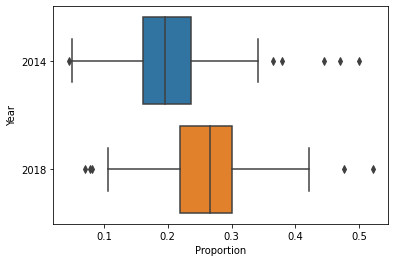

In [6]:
# plot the data
ax = sns.boxplot(
    data=mfirsts,
    x="value",
    y="variable")
ax.set(xlabel="Proportion", ylabel="Year")
plt.show()

## 4. Perform the hypothesis test

In [23]:
df_firsts[["prop_2014"]].describe()

,prop_2014
count,156.000000
mean,0.202889
std,0.072015
min,0.044776
25%,0.161262
50%,0.195375
75%,0.235942
max,0.500000


In [21]:
proportion_confint(
    count=df_firsts["f_2018"].sum(),
    nobs=df_firsts["n_2018"].sum())

(0.26778940554766323, 0.2704605737958134)

In [24]:
proportions_ztest(
    count=df_firsts["f_2018"].sum(),
    nobs=df_firsts["n_2018"].sum(),
    value=0.203)

(97.03813926692321, 0.0)

In [7]:
res <- prop.test(
    x = c(sum(firsts$f_2018), sum(firsts$f_2014)),
    n = c(sum(firsts$n_2018), sum(firsts$n_2018)))

SyntaxError: invalid syntax (<ipython-input-7-113fd5e835f3>, line 2)

In [7]:
res


	2-sample test for equality of proportions with continuity correction

data:  c(sum(firsts$f_2018), sum(firsts$f_2014)) out of c(sum(firsts$n_2018), sum(firsts$n_2018))
X-squared = 6975.2, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.07468673 0.07826597
sample estimates:
   prop 1    prop 2 
0.2691250 0.1926486 


In [8]:
# get Z_p
sqrt(res$statistic)

X-squared 
 83.51788